In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
file_path="/content/Traffic_Volume_Counts_20250319.csv"

In [72]:
df=pd.read_csv(file_path)

In [73]:
df

,ID,SegmentID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,20.0,10.0,11.0,...,104.0,105.0,147.0,120.0,91.0,83.0,74.0,49.0,42.0,42.0
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,21.0,16.0,8.0,...,102.0,98.0,133.0,131.0,95.0,73.0,70.0,63.0,42.0,35.0
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/11/2012,27.0,14.0,6.0,...,115.0,115.0,130.0,143.0,106.0,89.0,68.0,64.0,56.0,43.0
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/12/2012,22.0,7.0,7.0,...,71.0,127.0,122.0,144.0,122.0,76.0,64.0,58.0,64.0,43.0
4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/13/2012,31.0,17.0,7.0,...,113.0,126.0,133.0,135.0,102.0,106.0,58.0,58.0,55.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42751,373,35832,WEST 49th STREET,Rockefeller Plaza,6th Avenue,WB,11/18/2020,68.0,63.0,31.0,...,152.0,177.0,162.0,164.0,183.0,173.0,143.0,113.0,127.0,133.0
42752,373,35832,WEST 49th STREET,Rockefeller Plaza,6th Avenue,WB,11/19/2020,71.0,59.0,42.0,...,166.0,162.0,187.0,182.0,180.0,190.0,162.0,155.0,234.0,166.0
42753,373,35832,WEST 49th STREET,Rockefeller Plaza,6th Avenue,WB,11/20/2020,111.0,79.0,54.0,...,157.0,186.0,170.0,158.0,194.0,196.0,222.0,174.0,182.0,178.0
42754,373,35832,WEST 49th STREET,Rockefeller Plaza,6th Avenue,WB,11/21/2020,129.0,95.0,63.0,...,139.0,147.0,153.0,183.0,163.0,184.0,183.0,169.0,187.0,211.0


In [74]:
df["Date"]=pd.to_datetime(df["Date"], format="%m/%d/%Y")
df["Weekday"]=df["Date"].dt.dayofweek
df["Is_Weekend"]=df["Weekday"]>=5

In [75]:
df["Roadway Name"]=df["Roadway Name"].str.strip().str.upper()

In [76]:
time_columns=df.columns[7:]
df["Total_Traffic"]=df[time_columns].sum(axis=1)

In [77]:
major_nyc_roads = [
    "FDR DRIVE", "BELT PARKWAY", "BROOKLYN-QUEENS EXPRESSWAY", "HARLEM RIVER DRIVE",
    "GRAND CENTRAL PARKWAY", "CROSS BRONX EXPRESSWAY", "LONG ISLAND EXPRESSWAY",
    "HOLLAND TUNNEL", "BROADWAY", "3 AVENUE"
]

In [78]:
df["Roadway Name"] = df["Roadway Name"].replace({
    "BQE": "BROOKLYN-QUEENS EXPRESSWAY"
})

In [79]:
df_busiest_roads = df[df["Roadway Name"].isin(major_nyc_roads)]

In [80]:
borough_mapping = {
    "FDR DRIVE": "Manhattan",
    "BELT PARKWAY": "Brooklyn/Queens",
    "BROOKLYN-QUEENS EXPRESSWAY": "Brooklyn/Queens",
    "HARLEM RIVER DRIVE": "Manhattan",
    "GRAND CENTRAL PARKWAY": "Queens",
    "CROSS BRONX EXPRESSWAY": "Bronx",
    "LONG ISLAND EXPRESSWAY": "Queens",
    "HOLLAND TUNNEL": "Manhattan/NJ",
    "BROADWAY": "Manhattan",
    "3 AVENUE": "Bronx"

}

In [81]:
df_busiest_roads["Borough"] = df_busiest_roads["Roadway Name"].map(borough_mapping)
df_busiest_roads["Roadway Label"] = df_busiest_roads["Roadway Name"] + " (" + df_busiest_roads["Borough"] + ")"
road_traffic_busiest = df_busiest_roads.groupby(["Roadway Label", "Is_Weekend"])["Total_Traffic"].mean().unstack()

<ipython-input-81-d1f5c871af1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_busiest_roads["Borough"] = df_busiest_roads["Roadway Name"].map(borough_mapping)
<ipython-input-81-d1f5c871af1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_busiest_roads["Roadway Label"] = df_busiest_roads["Roadway Name"] + " (" + df_busiest_roads["Borough"] + ")"


<Figure size 1200x600 with 0 Axes>

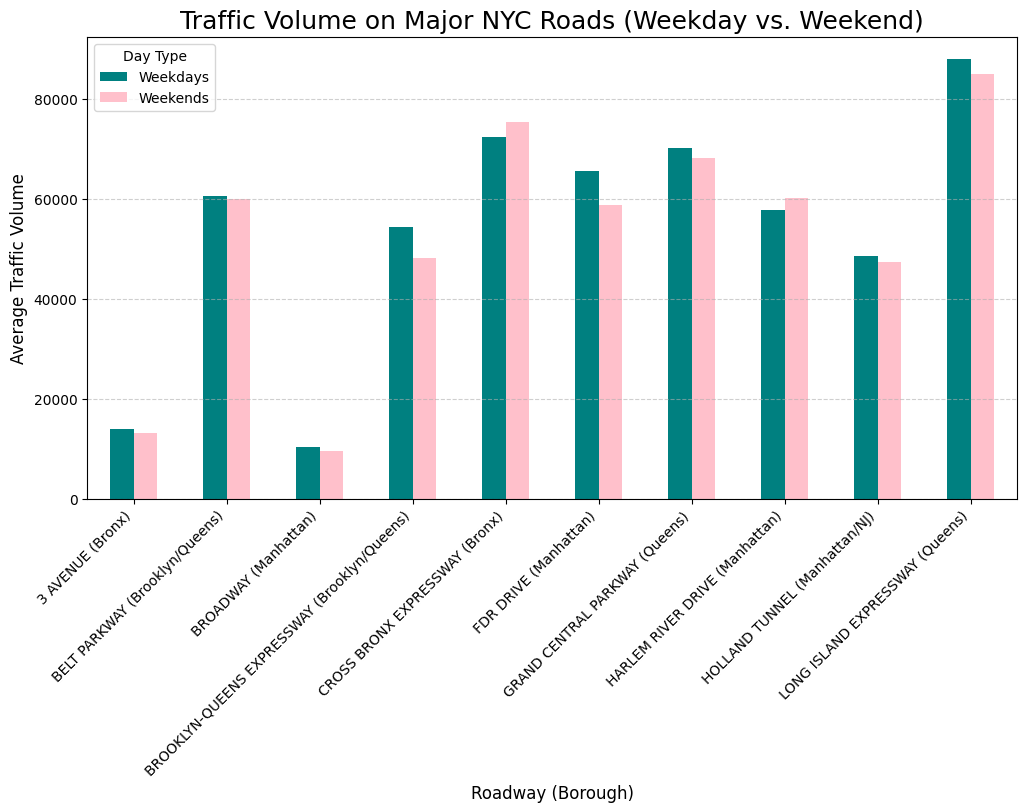

In [82]:
plt.figure(figsize=(12, 6))
road_traffic_busiest.plot(kind="bar", figsize=(12, 6), color=["teal", "pink"])
plt.title("Traffic Volume on Major NYC Roads (Weekday vs. Weekend)", fontsize=18)
plt.ylabel("Average Traffic Volume", fontsize=12)
plt.xlabel("Roadway (Borough)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(["Weekdays", "Weekends"], title="Day Type")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()